In [1]:
# Step 1: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [2]:
# Step 2: Load Data
data = pd.read_csv('student_spending (1).csv')

In [3]:
# Step 3: Data Preprocessing
# Encode categorical variables
X = pd.get_dummies(data.drop(columns=['preferred_payment_method']), drop_first=True)
y = data['preferred_payment_method']

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Model Training
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [4]:
# Step 6: Model Evaluation
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
                    precision    recall  f1-score   support

              Cash       0.31      0.29      0.30        59
 Credit/Debit Card       0.37      0.34      0.35        74
Mobile Payment App       0.27      0.31      0.29        67

          accuracy                           0.32       200
         macro avg       0.32      0.31      0.31       200
      weighted avg       0.32      0.32      0.32       200



In [5]:
# Step 6: Model Evaluation
# Predict probabilities
probabilities = model.predict_proba(X_test)

# Step 6: Model Evaluation
# Predict probabilities
probabilities = model.predict_proba(X_test)

# Convert probabilities to DataFrame
prob_df = pd.DataFrame(probabilities, columns=model.classes_)

# Display probabilities
print("Probabilities for each class:")
print(prob_df)

Probabilities for each class:
         Cash  Credit/Debit Card  Mobile Payment App
0    0.344465           0.288025            0.367509
1    0.146831           0.316620            0.536550
2    0.170059           0.465820            0.364120
3    0.263869           0.335908            0.400222
4    0.311036           0.325787            0.363177
..        ...                ...                 ...
195  0.224062           0.246552            0.529387
196  0.364502           0.276125            0.359373
197  0.573725           0.253220            0.173055
198  0.213387           0.333936            0.452677
199  0.208769           0.566749            0.224482

[200 rows x 3 columns]


In [6]:
# Predict class labels
predicted_labels = model.predict(X_test)

# Convert predicted labels to DataFrame
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': predicted_labels})

# Display prediction results
print("\nPredicted labels:")
print(result_df)


Predicted labels:
                 Actual           Predicted
521                Cash  Mobile Payment App
737   Credit/Debit Card  Mobile Payment App
740   Credit/Debit Card   Credit/Debit Card
660                Cash  Mobile Payment App
411                Cash  Mobile Payment App
..                  ...                 ...
408                Cash  Mobile Payment App
332  Mobile Payment App                Cash
208   Credit/Debit Card                Cash
613                Cash  Mobile Payment App
78                 Cash   Credit/Debit Card

[200 rows x 2 columns]


In [7]:
# Display probabilities
print("Probabilities for each class:")
print(probabilities)

Probabilities for each class:
[[0.34446539 0.28802547 0.36750914]
 [0.14683057 0.31661989 0.53654955]
 [0.17005944 0.46582046 0.3641201 ]
 [0.2638695  0.3359081  0.40022241]
 [0.31103585 0.32578676 0.36317739]
 [0.24882968 0.23388905 0.51728126]
 [0.38863097 0.39112139 0.22024764]
 [0.20661046 0.28696232 0.50642722]
 [0.44254943 0.20220715 0.35524341]
 [0.54221898 0.26556328 0.19221774]
 [0.31160699 0.19356142 0.49483159]
 [0.60533409 0.25753698 0.13712893]
 [0.23606572 0.49926586 0.26466841]
 [0.30525515 0.30527184 0.38947301]
 [0.38418192 0.21623564 0.39958244]
 [0.2927565  0.31131272 0.39593079]
 [0.30569887 0.42407903 0.2702221 ]
 [0.33737362 0.13805066 0.52457572]
 [0.40140129 0.39534936 0.20324935]
 [0.4851388  0.17123741 0.34362379]
 [0.46080832 0.30754642 0.23164526]
 [0.14408385 0.41871506 0.43720108]
 [0.1702453  0.55111164 0.27864306]
 [0.19215434 0.35029322 0.45755244]
 [0.28258981 0.31670031 0.40070988]
 [0.16577584 0.42196988 0.41225428]
 [0.15077876 0.48797334 0.36124791

In [8]:
# Predict class labels
predicted_labels = model.predict(X_test)

# Display prediction results
print("Predicted labels:")
print(predicted_labels)

Predicted labels:
['Mobile Payment App' 'Mobile Payment App' 'Credit/Debit Card'
 'Mobile Payment App' 'Mobile Payment App' 'Mobile Payment App'
 'Credit/Debit Card' 'Mobile Payment App' 'Cash' 'Cash'
 'Mobile Payment App' 'Cash' 'Credit/Debit Card' 'Mobile Payment App'
 'Mobile Payment App' 'Mobile Payment App' 'Credit/Debit Card'
 'Mobile Payment App' 'Cash' 'Cash' 'Cash' 'Mobile Payment App'
 'Credit/Debit Card' 'Mobile Payment App' 'Mobile Payment App'
 'Credit/Debit Card' 'Credit/Debit Card' 'Credit/Debit Card'
 'Mobile Payment App' 'Cash' 'Cash' 'Cash' 'Credit/Debit Card' 'Cash'
 'Credit/Debit Card' 'Credit/Debit Card' 'Credit/Debit Card' 'Cash'
 'Credit/Debit Card' 'Mobile Payment App' 'Cash' 'Credit/Debit Card'
 'Cash' 'Credit/Debit Card' 'Cash' 'Credit/Debit Card' 'Credit/Debit Card'
 'Cash' 'Mobile Payment App' 'Cash' 'Cash' 'Cash' 'Mobile Payment App'
 'Mobile Payment App' 'Credit/Debit Card' 'Credit/Debit Card' 'Cash'
 'Mobile Payment App' 'Credit/Debit Card' 'Cash' 'Cash'


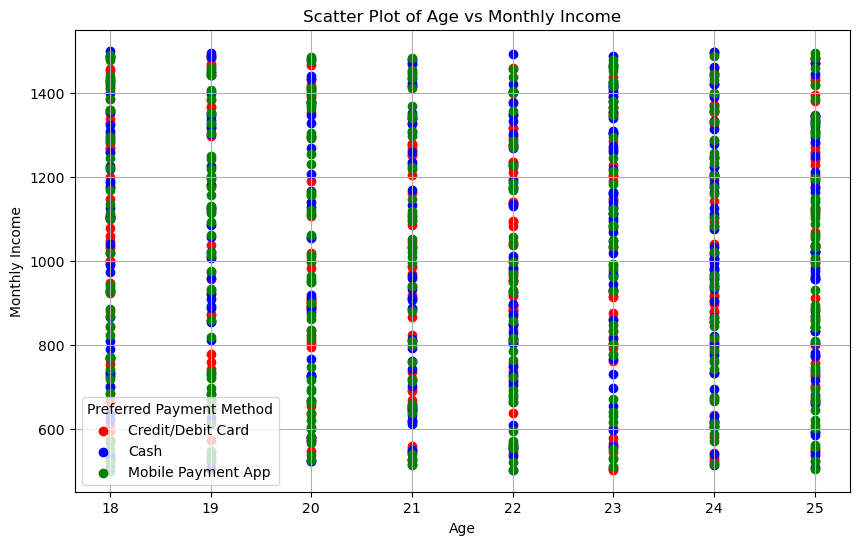

In [9]:
# Visualize Scatter Plot
# Choose features for visualization
payment_methods = data['preferred_payment_method'].unique()
colors = ['red', 'blue', 'green']  # You can define colors for each payment method if needed

plt.figure(figsize=(10, 6))
for i, method in enumerate(payment_methods):
    mask = data['preferred_payment_method'] == method
    plt.scatter(data[mask]['age'], data[mask]['monthly_income'], label=method, color=colors[i])

plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.title('Scatter Plot of Age vs Monthly Income')
plt.legend(title='Preferred Payment Method')
plt.grid(True)
plt.show()